In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
lines = []
with open("/Users/Nick/Downloads/log.json") as f:
    for line in f:
        lines.append(json.loads(line))
    r = f.read()

In [3]:
lines[0]

{'level': 'info',
 'fmt': 'log_dir = %s',
 'args': ['/tiger/u/lando/cheetahpretrain'],
 'caller': 'slbo/utils/flags.py:167',
 'time': '2019-02-11T17:22:36.714657'}

In [4]:
stage_real_reward = []
stage_virt_reward = []
stage_real_std = []
stage_virt_std = []
trpo_r = []

stages = []
stage = None

for line in lines:
    args = line["args"]
    if "Starting Stage" in line["fmt"]:
        stage = []
        stages.append(stage)
        continue
    if "[TRPO]" in line["fmt"]:
        trpo_r.append(args[2])
        if args[0] == 39:
            stage.append(args[2])
            continue
    if len(args) != 5:
        continue
    if args[0] == "episode":
        if args[1] == "Real Env":
            stage_real_reward.append(args[3])
            stage_real_std.append(args[4])
            continue
        if args[1] == "Virt Env":
            stage_virt_reward.append(args[3])
            stage_virt_std.append(args[4])
            continue
        raise Exception("bad data")

-27.77890568471833
[-667.6869532535678, -95.9611976995128, -53.45530441634787, -96.09180147567155, -67.80927622394418, -61.6079131338876, -37.0655240234441, -34.01167788143475, -36.801864564529694, -31.574858953111224]


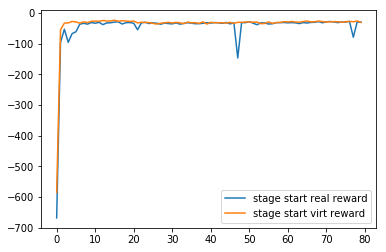

In [5]:
plt.plot(stage_real_reward, label="stage start real reward")
plt.plot(stage_virt_reward, label="stage start virt reward")
plt.legend()
print(max(stage_real_reward))
print(stage_real_reward[:10])

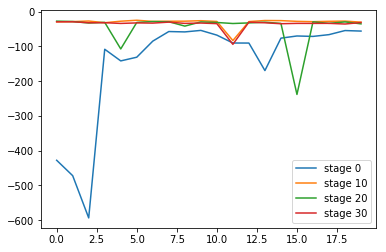

In [6]:
for i in range(4):
    plt.plot(stages[i*10], label=f"stage {10*i}")
plt.legend()

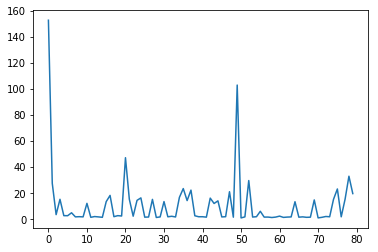

In [7]:
import numpy as np
stds = []
for i in range(len(stages)):
    stage = np.array(stages[i])
    stds.append(np.std(stage))
plt.plot(stds)

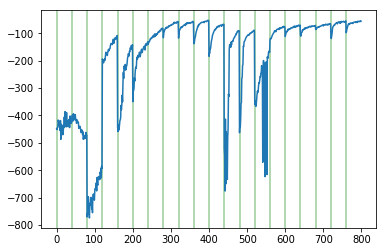

In [12]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[:800])

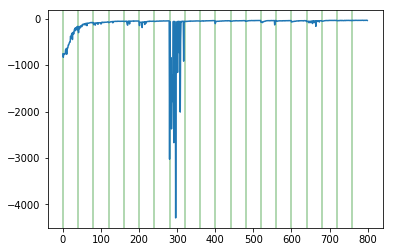

In [13]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[800:1600])

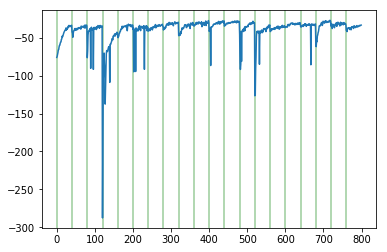

In [14]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[1600:2400])

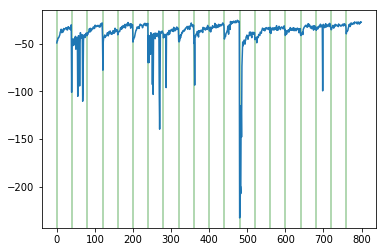

In [15]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[2400:3200])

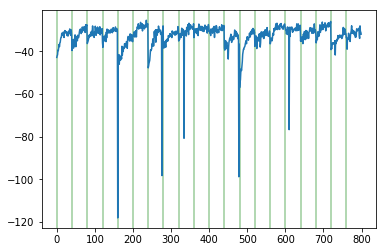

In [16]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[3200:4000])

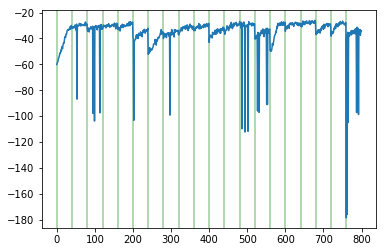

In [17]:
for i in range(20):
    plt.axvline(i*40, color="g", alpha=0.4)
plt.plot(trpo_r[4000:4800])

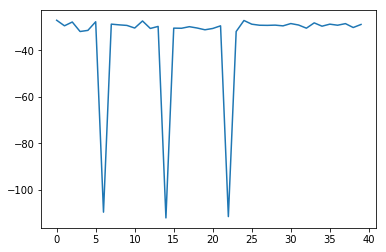

In [21]:
plt.plot(trpo_r[4000+480:4000+520])

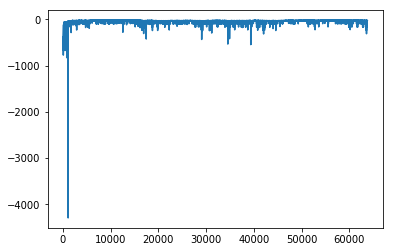

In [19]:
plt.plot(trpo_r)